Decision Tree Performance:
Decision Tree model accuracy with max_depth=3: 65.87%
Decision Tree model accuracy with max_depth=4: 74.32%
Decision Tree model accuracy with max_depth=5: 85.49%
Decision Tree model accuracy with max_depth=6: 89.00%
Decision Tree model accuracy with max_depth=7: 93.14%
Decision Tree model accuracy with max_depth=8: 93.30%
Decision Tree model accuracy with max_depth=9: 94.10%
Decision Tree model accuracy with max_depth=10: 93.78%


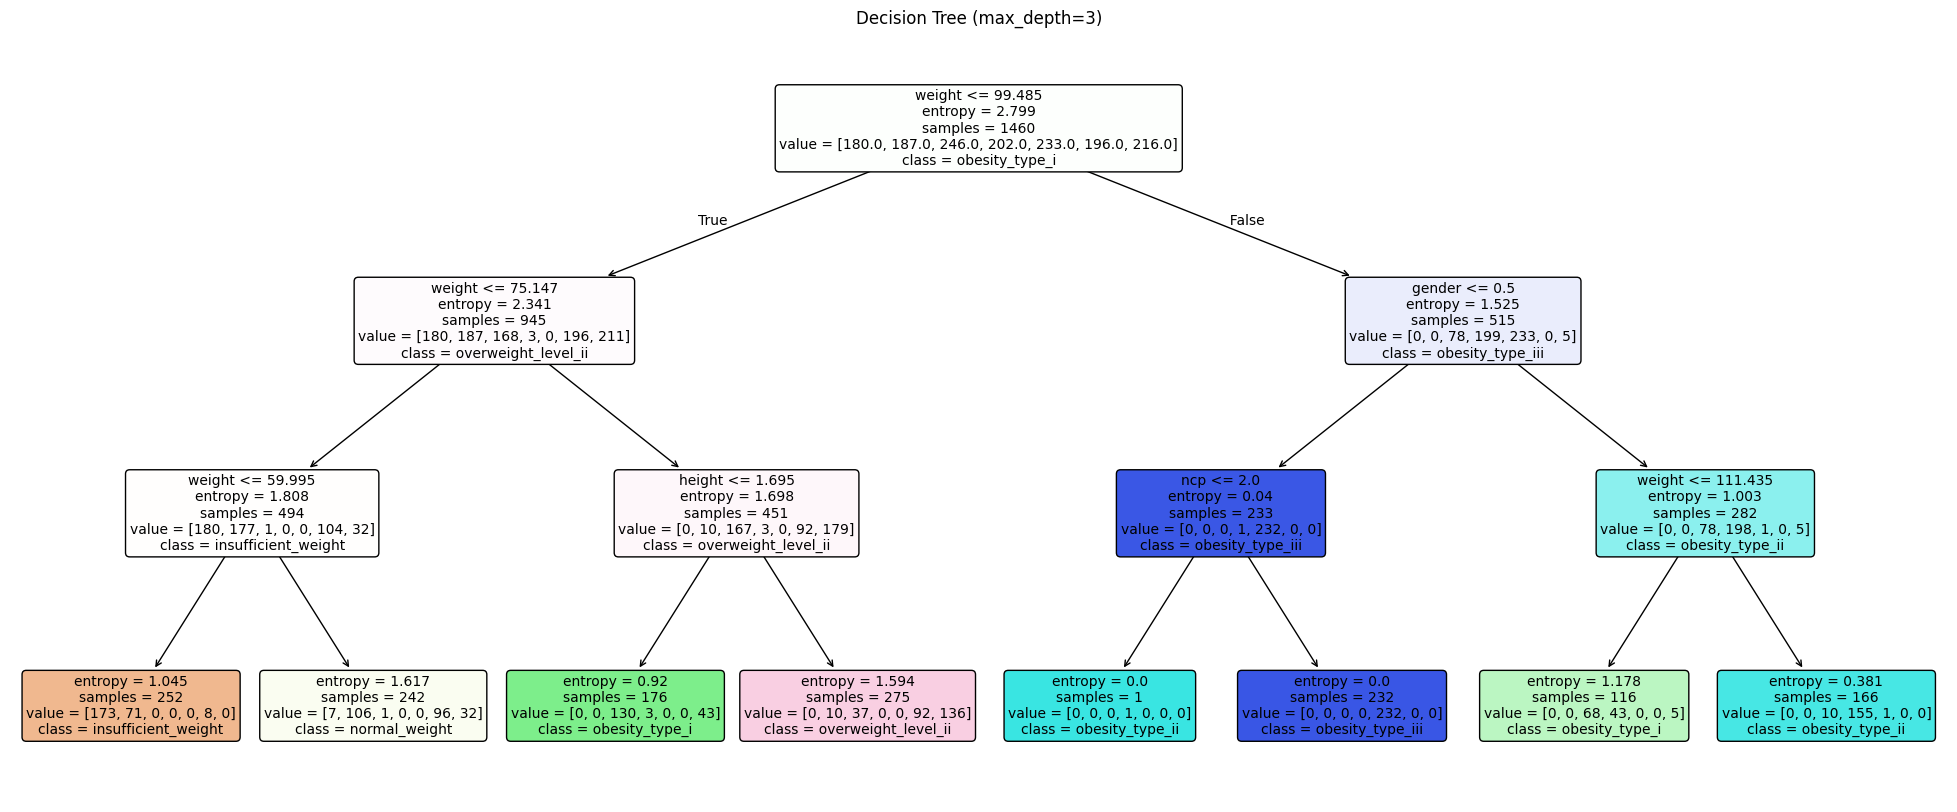


Random Forest Performance:
Random Forest model accuracy with max_depth=3: 70.81%
Random Forest model accuracy with max_depth=4: 82.93%
Random Forest model accuracy with max_depth=5: 88.04%
Random Forest model accuracy with max_depth=6: 91.87%
Random Forest model accuracy with max_depth=7: 92.50%
Random Forest model accuracy with max_depth=8: 93.94%
Random Forest model accuracy with max_depth=9: 94.42%
Random Forest model accuracy with max_depth=10: 95.22%


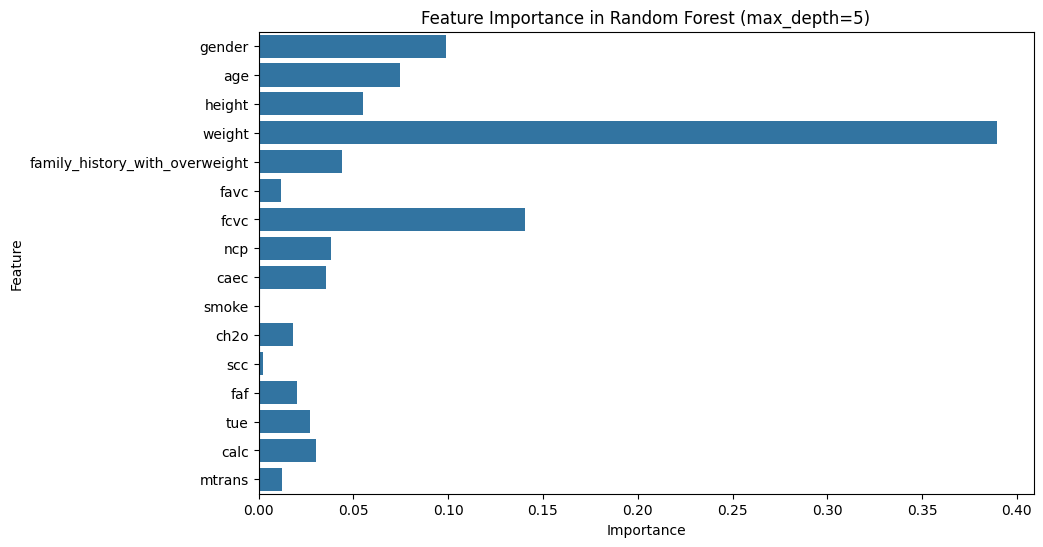

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('./preprocessed_obesity.csv')

# Step 2: Automatically define categorical columns based on data types, excluding the target column
target_column = 'nobeyesdad'
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Remove the target column from the categorical list
categorical_columns.remove(target_column)

# Step 3: Apply Label Encoding to the categorical columns
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Step 4: Define features and target variable
X = df.drop(target_column, axis=1)
y = df[target_column]

# Apply Label Encoding to the target column
y = label_encoder.fit_transform(y)

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Train Decision Tree models with different max_depth and print accuracy
print("Decision Tree Performance:")
for depth in range(3, 11):  # max_depth from 3 to 10
    clf_dt = DecisionTreeClassifier(max_depth=depth, criterion='entropy', random_state=42)
    clf_dt.fit(X_train, y_train)
    accuracy_dt = clf_dt.score(X_test, y_test)
    print(f"Decision Tree model accuracy with max_depth={depth}: {accuracy_dt * 100:.2f}%")

# Step 7: Visualize the Decision Tree for max_depth=3
clf_dt_3 = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)
clf_dt_3.fit(X_train, y_train)

plt.figure(figsize=(25, 10))
tree.plot_tree(clf_dt_3, 
               feature_names=X.columns, 
               class_names=label_encoder.classes_, 
               filled=True, 
               fontsize=10, 
               rounded=True)
plt.title("Decision Tree (max_depth=3)")
plt.show()

# Step 8: Train Random Forest models with different max_depth and print accuracy
print("\nRandom Forest Performance:")
for depth in range(3, 11):  # max_depth from 3 to 10
    clf_rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    clf_rf.fit(X_train, y_train)
    accuracy_rf = clf_rf.score(X_test, y_test)
    print(f"Random Forest model accuracy with max_depth={depth}: {accuracy_rf * 100:.2f}%")

# Step 9: Train Random Forest with max_depth=5 (or any preferred value) and plot feature importance
clf_rf_5 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
clf_rf_5.fit(X_train, y_train)

# Step 10: Get feature importance and plot it
feature_importances = clf_rf_5.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance in Random Forest (max_depth=5)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Decision Tree Performance:
Decision Tree model accuracy with max_depth=3: 65.87%
Decision Tree model accuracy with max_depth=4: 74.32%
Decision Tree model accuracy with max_depth=5: 85.49%
Decision Tree model accuracy with max_depth=6: 89.00%
Decision Tree model accuracy with max_depth=7: 93.14%
Decision Tree model accuracy with max_depth=8: 93.30%
Decision Tree model accuracy with max_depth=9: 94.10%
Decision Tree model accuracy with max_depth=10: 93.78%


Random Forest Performance:
Random Forest model accuracy with max_depth=3: 70.81%
Random Forest model accuracy with max_depth=4: 82.93%
Random Forest model accuracy with max_depth=5: 88.04%
Random Forest model accuracy with max_depth=6: 91.87%
Random Forest model accuracy with max_depth=7: 92.50%
Random Forest model accuracy with max_depth=8: 93.94%
Random Forest model accuracy with max_depth=9: 94.42%
Random Forest model accuracy with max_depth=10: 95.22%